 # Práctica Guiada 2.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión no Lineal  \\
  

 ----




1.  En esta práctica se pide realizar pruebas utilizando  para analizar el comportamiento de la regularizacion, tanto $L_1$ como $L_2$
2.  Se le proporcionrá una bases de datos generada mediante una función seno, la cual deberá utilizar para generar una aproximación mediante regresión no lineal.

3. MSE Loss Function \\

 a. $MSE + L_2 = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2 + \lambda\sum_{i=1}^p (w_i)^2$

 b. $MSE + L_1 = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2 + \lambda\sum_{i=1}^p |w_i|$

4. Utilize todo los datos del dataset para entrenar  el modelo, analizar las funciones de pérdida con los distintos métodos de regularizción, grafique los resultados y muestre un video donde se pueda ver el ajuste de la función.

Importante: No se olvide de normalizar los datos entre cero y uno, por cada columna.





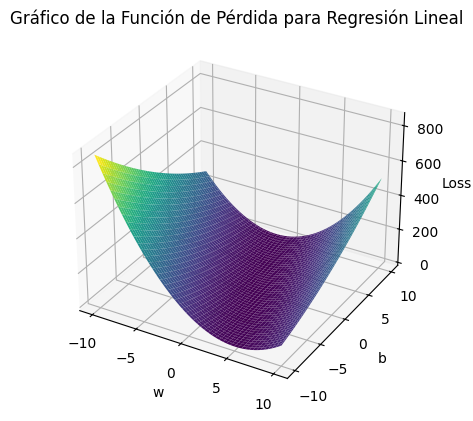

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Datos de ejemplo
x_i = np.array([1, 2, 3, 4])
y_i = np.array([2, 3, 5, 7])

# Crear malla de parámetros w y b
w = np.linspace(-10, 10, 100)
b = np.linspace(-10, 10, 100)
W, B = np.meshgrid(w, b)



# Calcular función de pérdida
L = np.zeros(W.shape)
n = len(x_i)

for i in range(n):
    L += (y_i[i] - (W * x_i[i] + B)) ** 2

L = L / (2 * n)

# Graficar la función de pérdida
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, L, cmap='viridis')

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')
plt.title('Gráfico de la Función de Pérdida para Regresión Lineal')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

from sklearn.preprocessing import MinMaxScaler

Crear el DataSet







    x_train   y_train
0       0.0  0.112498
1       0.1 -0.063890
2       0.2  0.510143
3       0.3  0.176637
4       0.4  0.359109
..      ...       ...
58      5.8 -0.406240
59      5.9 -0.114694
60      6.0 -0.332139
61      6.1 -0.353869
62      6.2 -0.166816

[63 rows x 2 columns]


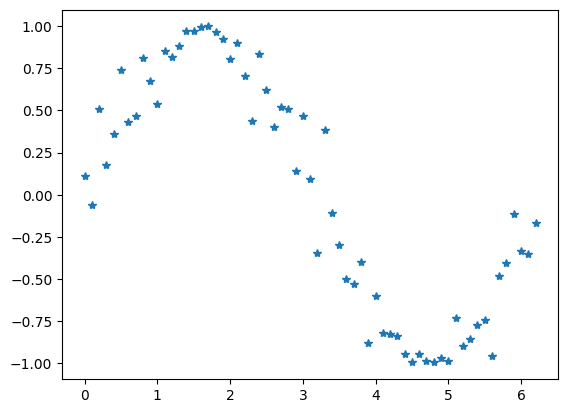

In [ ]:
# create training  dataset.
x_vals = np.arange(0,2*np.pi,0.1)
y_vals =  [ np.sin(e + np.random.normal(0,0.2) ) for e  in x_vals]
data = pd.DataFrame({"x_train":x_vals, "y_train":y_vals})
print(data)
plt.plot(x_vals, y_vals,'*',)
X = x_vals
Y = y_vals


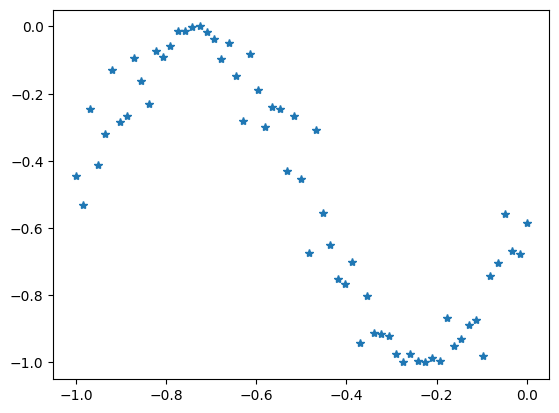

In [ ]:

X  = (min(X) - X)/(max(X) - min(X))
Y  = (min(Y) - Y)/(max(Y) - min(Y))

plt.plot(X,Y,"*")



# Modelo

Nota: Antes añadir Añadir una columna de nx1 a X con valor 1.

$h(X) = X*W^t$



In [ ]:
def h(X, W):
    return np.dot(X, np.transpose(W))

# Loss function
Nota: La función de pérdida no cambia, solo la llamada a la función h

$\mathcal{L} =  \frac{||Y - XW^t||^2_2}{2n} + \lambda||W||^2_2$



In [ ]:
def Error(X, W, Y,lam):
    n = len(X)
    return 1/(2*n) * np.norm(Y - h(X, W))**2 + lam*np.norm(W)**2

# Cálculo de derivadas
Nota: Intente resolver este algoritmo desde un punto de vista matricial.

$dw_j = \frac{\sum_{i=0}^m(y_i - h(x_i))(-x_{i}^j)}{n} + 2\lambda w_j$

In [ ]:
def derivada(X, W, Y, lam):
    # write your code here
    # Return a (k+1)x1 vector. This vector contains the derivatives from Loss function
    # respect to all variable w_j
    n = len(X)
    return 1/n * np.dot(np.transpose(Y - h(X,W)), X) + 2*lam*W



# Actualiación de parámetros

Recuerde: $\frac{\partial L}{\partial w}$ representa un vector con todas las derivadas de la función de pérdida con rescto a W.

$W  = W - \alpha*\frac{\partial L}{\partial W} $



In [ ]:
def update(W,  dW, alpha):
    # write your code here


# Training

In [ ]:
def train(X, Y, epochs, alfa,lam):
    np.random.seed(2001)
    W = np.array([np.random.rand() for i in range(X.shape[1])])
    L = Error(X,W,Y,lam)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y,lam)
        W = update(W, dW, alfa)
        L = Error(X, W,Y,lam)
        loss.append(L)
        if i%100000==0:
            print(L)
    return W, loss

0.12780147078540616


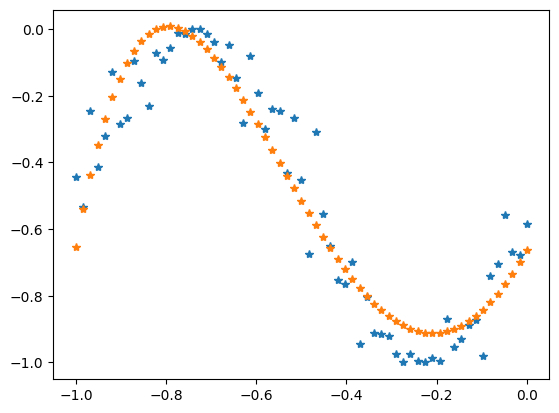

In [ ]:
#Plotear la ecuación
def conver_matrix(X, p):
  potencia = [i for i in range(p)]
  XX = [ [ e**i for e in X ] for i in potencia]
  return np.array(XX).T



XX = conver_matrix(X,6)
w , loss = train(XX,Y, 10000, 0.9, 0)
plt.plot(X,Y,"*")
y_aprox = h(XX,w)

plt.plot(X,y_aprox,"*")


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
plt.plot(X,Y,"*")
plt.plot(X,reg.predict(X),"*")



Carry out the following experiments:

1. Run the model with $n={100,1000,10000,100000}$ data points.
2. For each experiment, use $70\%$  for training the model,  $20\%$ for validation, and $10\%$ for testing.
3. Calculate the testing, validation, and training error for each experiment. Report a table with the results.
4. Vary the regularization parameter $\lambda$ in the following manner:
 $\lambda = {0.001, 0.01,0.1,1,10,100}$.
5. Analyze what happens with each regularization method, $L_2$, $L_1$;  when $\lambda$ is a large value and when it is a small value. Additionally, print the value of the weights at the end of each experiment and indicate in which cases the vector W is more sparse or has values closer to 0. When do you use. is more sparse or has values closer to 0.
6. Report a table with the results and a graph.
7.  Vary the degree of the polynomial in the following manner $g = {2,3,4,5,...20}$ and run the model first without regularization and then with $L_1$ y
  regularization and with $L_2$.  For each experiment, compute the training, validation, and testing error. Report a table with the results and conclude what happens when $g$ is very large, what happens when it is small, and what is the optimal $g$ according to your results.

Note: For the test data, only report the final average error in each experiment.


